In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from datetime import datetime

# Load data
city_hotel_prep = pd.read_csv("/content/City_hotel_Prep.csv")
cleaned_hotel_bookings = pd.read_csv("/content/cleaned_hotel_bookings.csv")

# Drop 'Unnamed: 0' columns if they are just indices
if 'Unnamed: 0' in city_hotel_prep.columns:
    city_hotel_prep.drop(columns=['Unnamed: 0'], inplace=True)
if 'Unnamed: 0' in cleaned_hotel_bookings.columns:
    cleaned_hotel_bookings.drop(columns=['Unnamed: 0'], inplace=True)

# Encode categorical variables
city_hotel_prep['hotel'] = city_hotel_prep['hotel'].astype(str)
cleaned_hotel_bookings['hotel'] = cleaned_hotel_bookings['hotel'].astype(str)

# Combine both datasets to ensure all labels are encountered during fitting
combined_hotel_data = pd.concat([city_hotel_prep, cleaned_hotel_bookings], ignore_index=True)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'hotel' column
combined_hotel_data['hotel'] = label_encoder.fit_transform(combined_hotel_data['hotel'])

In [ ]:
combined_hotel_data.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,reserved_room_type,customer_type,adr,total_of_special_requests,date
0,0,88,2015,7,27,1,0,4,2,BB,PRT,Online TA,A,Transient,76.5,1,2015-07-01
1,0,65,2015,7,27,1,0,4,1,BB,PRT,Online TA,A,Transient,68.0,1,2015-07-01
2,0,92,2015,7,27,1,2,4,2,BB,PRT,Online TA,A,Transient,76.5,2,2015-07-01
3,0,100,2015,7,27,2,0,2,2,BB,PRT,Online TA,A,Transient,76.5,1,2015-07-02
4,0,79,2015,7,27,2,0,3,2,BB,PRT,Online TA,A,Transient,76.5,1,2015-07-02


In [ ]:
#Identify missing values in the dataset:
python

combined_hotel_data.isnull().sum()

hotel                        0
lead_time                    0
arrival_date_year            0
arrival_date_month           0
arrival_date_week_number     0
arrival_date_day_of_month    0
stays_in_weekend_nights      0
stays_in_week_nights         0
adults                       0
meal                         0
country                      0
market_segment               0
reserved_room_type           0
customer_type                0
adr                          0
total_of_special_requests    0
date                         0
dtype: int64

In [ ]:
#Encoding Categorical Variables
combined_hotel_data= pd.get_dummies(combined_hotel_data, columns=['hotel', 'meal', 'country', 'market_segment', 'reserved_room_type', 'customer_type'])


In [ ]:
# Date Features
#Extract useful features from the date column if necessary
combined_hotel_data['date'] = pd.to_datetime(combined_hotel_data['date'])
combined_hotel_data['year'] = combined_hotel_data['date'].dt.year
combined_hotel_data['month'] = combined_hotel_data['date'].dt.month
combined_hotel_data['day'] = combined_hotel_data['date'].dt.day
combined_hotel_data = combined_hotel_data.drop('date', axis=1)


In [ ]:
#Feature Scaling
#Scale numerical features
scaler = StandardScaler()
combined_hotel_data[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'total_of_special_requests']] = scaler.fit_transform(combined_hotel_data[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'total_of_special_requests']])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#sns.pairplot(combined_hotel_data)
#plt.show()

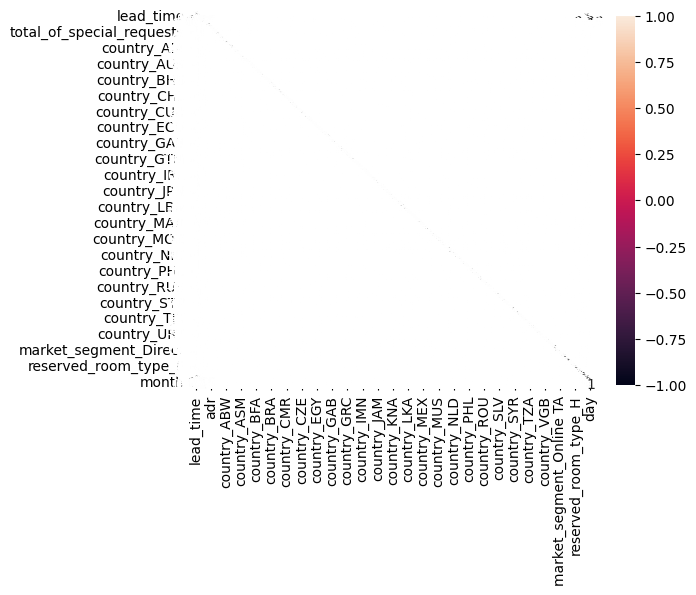

In [ ]:
#Exploratory Data Analysis (EDA)
#Correlation Analysis
correlation_matrix =combined_hotel_data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
#Model Selection and Training
#Split the Data
#Split into training and testing sets
from sklearn.model_selection import train_test_split

X = combined_hotel_data.drop('adr', axis=1)
y = combined_hotel_data['adr']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Train models like Linear Regression, Decision Trees, and Random Forest
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} model trained.")

Linear Regression model trained.
Decision Tree model trained.
Random Forest model trained.


In [ ]:
#Use Grid Search or Random Search:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

In [ ]:
##Evaluate using metrics:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


In [ ]:
#Perform cross-validation:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation scores:", scores)

In [ ]:
#Identify important features

importances = best_model.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances)

In [ ]:
#Save the model
import joblib

joblib.dump(best_model, 'hotel_price_prediction_model.pkl')

In [ ]:
#Create a web interface using Flask or Streamlit:

import streamlit as st
import joblib

model = joblib.load('hotel_price_prediction_model.pkl')

st.title("Hotel Price Prediction")
lead_time = st.number_input("Lead Time")
stays_in_weekend_nights = st.number_input("Stays in Weekend Nights")
stays_in_week_nights = st.number_input("Stays in Week Nights")
adults = st.number_input("Number of Adults")
# Add inputs for other features...

if st.button("Predict"):
    prediction = model.predict([[lead_time, stays_in_weekend_nights, stays_in_week_nights, adults, ...]])
    st.write(f"Predicted Price: {prediction[0]}")